In [366]:
from PIL import Image, ImageDraw

In [367]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


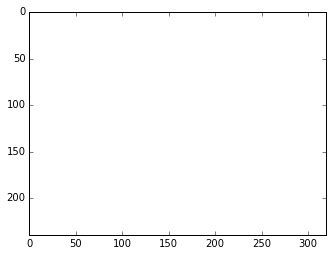

In [368]:
scene = Image.new('RGBA', (320, 240))
imshow(asarray(scene))

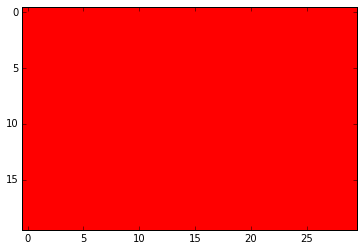

In [369]:
obj = Image.new('RGBA', (30,20), (255,0,0,255))
objBounds = numpy.array([[0,obj.size[0],obj.size[0],0],[0,0,obj.size[1],obj.size[1]],[1,1,1,1]])
imshow(asarray(obj))

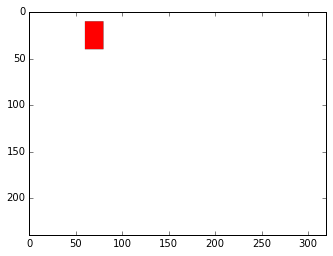

In [370]:
objAngle = pi/2
objTransform = numpy.array([[cos(objAngle),sin(objAngle), 60],[-sin(objAngle), cos(objAngle), 40],[0,0,1]])
objView = obj.transform(scene.size, Image.AFFINE, linalg.inv(objTransform).flatten()[:7])
imshow(objView)

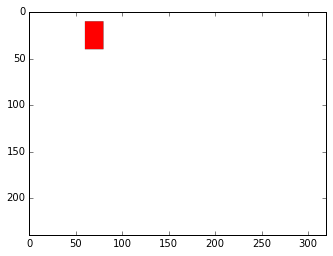

In [371]:
scene.paste(objView, (0,0))
imshow(asarray(scene))

In [372]:
camAngle = pi/2
camTransform = numpy.array([[cos(camAngle),sin(camAngle), -20],[-sin(camAngle), cos(camAngle), 40],[0,0,1]])

In [373]:
camSize = (180,120)
camBounds = numpy.array([[0,camSize[0],camSize[0],0],[0,0,camSize[1],camSize[1]],[1,1,1,1]])
transformedCamBounds = dot(dot(objTransform, camTransform), camBounds)
polygon = transformedCamBounds[:2,:].T.flatten()
print polygon

[ 100.   60.  -80.   60.  -80.  -60.  100.  -60.]


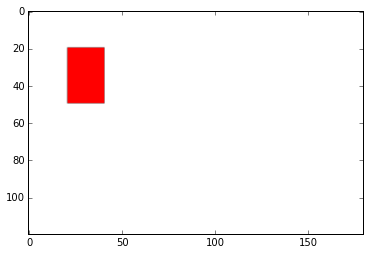

In [374]:
camera = scene.transform(camSize, Image.AFFINE, dot(objTransform, camTransform).flatten()[:7])
imshow(asarray(camera))

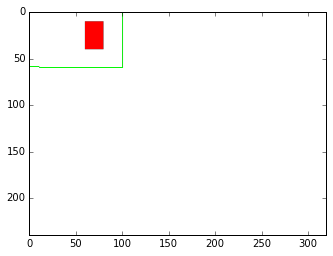

In [375]:
sceneDraw = ImageDraw.ImageDraw(scene)
#sceneDraw.rectangle(tuple([0,0] + list(camSize)))
sceneDraw.polygon(map(int,polygon), outline=(0,255,0))
imshow(scene)

In [376]:
camObjBounds = dot(linalg.inv(camTransform), objBounds)
print camObjBounds

[[ 40.  40.  20.  20.]
 [ 20.  50.  50.  20.]
 [  1.   1.   1.   1.]]


In [377]:
sceneObjBounds = dot(objTransform, objBounds)
print sceneObjBounds

[[ 60.  60.  80.  80.]
 [ 40.  10.  10.  40.]
 [  1.   1.   1.   1.]]


In [2]:
import os
import pycocotools.coco
import numpy

In [3]:
dataDir = '/home/datasets/datasets1/mscoco'

In [4]:
partition = numpy.random.choice(['val2014', 'train2014'])
%time scenePath = numpy.random.choice(os.listdir(os.path.join(dataDir, 'images', partition)))

CPU times: user 16.2 ms, sys: 14.8 ms, total: 30.9 ms
Wall time: 32 ms


In [5]:
scenePath

'COCO_val2014_000000343213.jpg'

In [6]:
annotations = os.path.join(dataDir, 'annotations', 'instances_{}.json'.format(partition))
%time coco = pycocotools.coco.COCO(annotations)

loading annotations into memory...
Done (t=8.36s)
creating index...
index created!
CPU times: user 8.36 s, sys: 1.45 s, total: 9.8 s
Wall time: 10.4 s


In [47]:
catIds = coco.getCatIds()
cats = coco.loadCats(catIds)
print cats
nms=set([cat['supercategory'] for cat in cats])
for superCat in nms:
    print superCat, [cat['name'] for cat in cats if cat['supercategory']==superCat]

[{u'supercategory': u'person', u'id': 1, u'name': u'person'}, {u'supercategory': u'vehicle', u'id': 2, u'name': u'bicycle'}, {u'supercategory': u'vehicle', u'id': 3, u'name': u'car'}, {u'supercategory': u'vehicle', u'id': 4, u'name': u'motorcycle'}, {u'supercategory': u'vehicle', u'id': 5, u'name': u'airplane'}, {u'supercategory': u'vehicle', u'id': 6, u'name': u'bus'}, {u'supercategory': u'vehicle', u'id': 7, u'name': u'train'}, {u'supercategory': u'vehicle', u'id': 8, u'name': u'truck'}, {u'supercategory': u'vehicle', u'id': 9, u'name': u'boat'}, {u'supercategory': u'outdoor', u'id': 10, u'name': u'traffic light'}, {u'supercategory': u'outdoor', u'id': 11, u'name': u'fire hydrant'}, {u'supercategory': u'outdoor', u'id': 13, u'name': u'stop sign'}, {u'supercategory': u'outdoor', u'id': 14, u'name': u'parking meter'}, {u'supercategory': u'outdoor', u'id': 15, u'name': u'bench'}, {u'supercategory': u'animal', u'id': 16, u'name': u'bird'}, {u'supercategory': u'animal', u'id': 17, u'name'

In [48]:
%time imgIds = coco.getImgIds(catIds=catIds)

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.6 ms


In [49]:
%time objData = coco.loadImgs(imgIds)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 232 µs


In [66]:
objData

[{u'coco_url': u'http://mscoco.org/images/245112',
  u'date_captured': u'2013-11-21 19:46:24',
  u'file_name': u'COCO_val2014_000000245112.jpg',
  u'flickr_url': u'http://farm3.staticflickr.com/2434/4012854656_5e26bed6dc_z.jpg',
  u'height': 500,
  u'id': 245112,
  u'license': 3,
  u'width': 350},
 {u'coco_url': u'http://mscoco.org/images/126744',
  u'date_captured': u'2013-11-24 10:11:19',
  u'file_name': u'COCO_val2014_000000126744.jpg',
  u'flickr_url': u'http://farm3.staticflickr.com/2665/3913625583_0f8733c01d_z.jpg',
  u'height': 480,
  u'id': 126744,
  u'license': 3,
  u'width': 640},
 {u'coco_url': u'http://mscoco.org/images/201723',
  u'date_captured': u'2013-11-21 20:24:27',
  u'file_name': u'COCO_val2014_000000201723.jpg',
  u'flickr_url': u'http://farm4.staticflickr.com/3568/3513903367_e45c4e1ce0_z.jpg',
  u'height': 500,
  u'id': 201723,
  u'license': 4,
  u'width': 333},
 {u'coco_url': u'http://mscoco.org/images/204804',
  u'date_captured': u'2013-11-15 03:19:29',
  u'file

In [51]:
objFileNames = [obj['file_name'] for obj in objData]
%time objPath = os.path.join(dataDir, 'images', partition, numpy.random.choice(objFileNames))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 174 µs


In [61]:
%time objAnnIds = coco.getAnnIds(imgIds=[obj['id'] for obj in objData], catIds=catIds, iscrowd=False)
%time objAnns = coco.loadAnns(objAnnIds)

CPU times: user 7.6 ms, sys: 0 ns, total: 7.6 ms
Wall time: 7.98 ms
CPU times: user 657 µs, sys: 0 ns, total: 657 µs
Wall time: 660 µs


In [62]:
len(objAnns)

1780

In [63]:
polygons = [obj['segmentation'] for obj in objAnns]

In [64]:
len(polygons)

1780

In [72]:
%time objFileNames = {obj['id']:obj['file_name'] for obj in objData}

CPU times: user 858 µs, sys: 0 ns, total: 858 µs
Wall time: 617 µs


In [85]:
cocoDict = [
    {
        k:obj.get(k, objFileNames[obj['image_id']] if k == 'file_name' else None)
        for k in ['category_id', 'image_id', 'segmentation', 'file_name']
    }
    for obj in objAnns]

In [86]:
len(cocoDict)

1780

In [88]:
import pickle

In [91]:
pickle.dump??

In [92]:
cats

[{u'id': 1, u'name': u'person', u'supercategory': u'person'},
 {u'id': 2, u'name': u'bicycle', u'supercategory': u'vehicle'},
 {u'id': 3, u'name': u'car', u'supercategory': u'vehicle'},
 {u'id': 4, u'name': u'motorcycle', u'supercategory': u'vehicle'},
 {u'id': 5, u'name': u'airplane', u'supercategory': u'vehicle'},
 {u'id': 6, u'name': u'bus', u'supercategory': u'vehicle'},
 {u'id': 7, u'name': u'train', u'supercategory': u'vehicle'},
 {u'id': 8, u'name': u'truck', u'supercategory': u'vehicle'},
 {u'id': 9, u'name': u'boat', u'supercategory': u'vehicle'},
 {u'id': 10, u'name': u'traffic light', u'supercategory': u'outdoor'},
 {u'id': 11, u'name': u'fire hydrant', u'supercategory': u'outdoor'},
 {u'id': 13, u'name': u'stop sign', u'supercategory': u'outdoor'},
 {u'id': 14, u'name': u'parking meter', u'supercategory': u'outdoor'},
 {u'id': 15, u'name': u'bench', u'supercategory': u'outdoor'},
 {u'id': 16, u'name': u'bird', u'supercategory': u'animal'},
 {u'id': 17, u'name': u'cat', u'su

In [95]:
import unexisting

ImportError: No module named unexisting